# **Classifications of rare diseases:**

El objetivo es predecir el tipo de trastorno o enfermedad con base en los datos de los ansestros.

El contexto comercial podría ser que el modelo es utilizado en hospitales o clínicas especializadas para mejorar los procesos de diagnóstico, especialmente cuando los médicos enfrentan enfermedades raras o complejas que no tienen patrones evidentes.
También las empresas de seguros podrían beneficiarse de este tipo de modelo para evaluar mejor los riesgos asociados con ciertas enfermedades y trastornos.
Y otro puede ser las empresas farmacéuticas para mejorar la investigación y desarrollo de medicamentos destinados a enfermedades raras o trastornos específicos.

## **Lectura de datos:**

### **Librerias necesarias:**

In [1]:
import pandas as pd               #Importamos todas las librerias que vamos a
import numpy as np                #trabajar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import urllib.request
from google.colab import files

### **Lectura del Dataset:**

In [2]:
uploaded = files.upload()

Saving en_product3_146.xml to en_product3_146.xml
Saving en_product3_147.xml to en_product3_147.xml
Saving en_product3_148.xml to en_product3_148.xml
Saving en_product3_150.xml to en_product3_150.xml
Saving en_product3_152.xml to en_product3_152.xml
Saving en_product3_156.xml to en_product3_156.xml
Saving en_product3_182.xml to en_product3_182.xml


In [3]:
#url1='https://github.com/felipeduque2411/Classification_disease/blob/main/en_product3_146.xml'
#response1 = urllib.request.urlopen(url1)
#xml_dato1 = response1.read()
#dxml_dato1=xml_dato1.decode('ISO-8859-1')
#tree1 = ET.ElementTree(ET.fromstring(xml_dato1))

In [4]:
filename1 = 'en_product3_146.xml'
filename2 = 'en_product3_150.xml'
filename3 = 'en_product3_148.xml'
filename4 = 'en_product3_147.xml'
filename5 = 'en_product3_152.xml'
filename6 = 'en_product3_156.xml'
filename7 = 'en_product3_182.xml'

In [5]:
# Parsear el archivo XML
tree1 = ET.parse(filename1)
tree2 = ET.parse(filename2)
tree3 = ET.parse(filename3)
tree4 = ET.parse(filename4)
tree5 = ET.parse(filename5)
tree6 = ET.parse(filename6)
tree7 = ET.parse(filename7)

In [6]:
# Cargar el archivo XML
root = tree1.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df1 = pd.DataFrame(classifications)

In [7]:
# Cargar el archivo XML
root = tree2.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })

# Crear un DataFrame
df2 = pd.DataFrame(classifications)

In [8]:
# Cargar el archivo XML
root = tree3.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df3 = pd.DataFrame(classifications)

In [9]:
# Cargar el archivo XML
root = tree4.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df4 = pd.DataFrame(classifications)

In [10]:
# Cargar el archivo XML
root = tree5.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df5 = pd.DataFrame(classifications)

In [11]:
# Cargar el archivo XML
root = tree6.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df6 = pd.DataFrame(classifications)

In [12]:
# Cargar el archivo XML
root = tree7.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    break

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df7 = pd.DataFrame(classifications)

In [13]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True) # Se crea uno nuevo de todos

### **Análisis inicial del dataset:**

In [14]:
df.shape

(27114, 28)

In [15]:
df.head()

,Classification ID,Orpha Number,Classification Name,Disorder ID,ORPHA Code,Expert Link,Disorder Name,Disorder Type,Has Parent,Parent ORPHA Code,...,3rd Gen Disorder Name,3rd Gen Disorder Type,Has 4th Gen,4th Gen ORPHA Code,4th Gen Disorder Name,4th Gen Disorder Type,Has 5th Gen,5th Gen ORPHA Code,5th Gen Disorder Name,5th Gen Disorder Type
0,146,156265,Orphanet classification of rare cardiac diseases,12948,97929,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Rare cardiac disease,Category,False,0,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
1,146,156265,Orphanet classification of rare cardiac diseases,17712,167848,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Rare cardiomyopathy,Category,True,97929,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
2,146,156265,Orphanet classification of rare cardiac diseases,8591,247,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Inherited arrhythmogenic cardiomyopathy,Clinical group,True,167848,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
3,146,156265,Orphanet classification of rare cardiac diseases,10333,34217,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Naxos disease,Disease,True,247,...,Rare cardiac disease,Category,False,0,N/A,N/A,False,0,N/A,N/A
4,146,156265,Orphanet classification of rare cardiac diseases,18885,217656,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Inherited isolated arrhythmogenic cardiomyopathy,Disease,True,247,...,Rare cardiac disease,Category,False,0,N/A,N/A,False,0,N/A,N/A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Classification ID          27114 non-null  object
 1   Orpha Number               27114 non-null  object
 2   Classification Name        27114 non-null  object
 3   Disorder ID                27114 non-null  object
 4   ORPHA Code                 27114 non-null  object
 5   Expert Link                27114 non-null  object
 6   Disorder Name              27114 non-null  object
 7   Disorder Type              27114 non-null  object
 8   Has Parent                 27114 non-null  bool  
 9   Parent ORPHA Code          27114 non-null  object
 10  Parent Disorder Name       27114 non-null  object
 11  Parent Disorder Type       27114 non-null  object
 12  Has GrandParent            27114 non-null  bool  
 13  GrandParent ORPHA Code     27114 non-null  object
 14  GrandP

In [ ]:
df.describe(include=('object')).T

,count,unique,top,freq
Classification ID,27114,7,156,18538
Orpha Number,27114,7,158293,18538
Classification Name,27114,7,Orphanet classification of rare genetic diseases,18538
Disorder ID,27114,7485,206,33
ORPHA Code,27114,7485,648,33
Expert Link,27114,7485,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,33
Disorder Name,27114,7485,Noonan syndrome,33
Disorder Type,27114,11,Disease,9298
Parent ORPHA Code,27114,1690,611327,1736
Parent Disorder Name,27114,1690,Genetic multiple congenital anomalies/dysmorph...,1736


Dataset con 27114 filas y 25 columnas que por el momento tienen el tipo objeto. Vamos a retirar columnas que para este objetivo no nos interesan, como la mayoría de ID y otras. Las columnas restantes vamos a manejarlas como string y las boolean pasarlas como 1 y 0 respectivamente.
 1   Orpha Number               Drop
 2   Classification Name        Drop
 3   Disorder ID                Drop
 4   ORPHA Code                 String
 5   Expert Link                Drop
 6   Disorder Name              String
 7   Disorder Type              String
 8   Has Parent                 bool  
 9   Parent ORPHA Code          Drop
 10  Parent Disorder Name       String
 11  Parent Disorder Type       String
 12  Has GrandParent            bool  
 13  GrandParent ORPHA Code     Drop
 14  GrandParent Disorder Name  String
 15  GrandParent Disorder Type  String
 16  Has 3rd Gen                bool  
 17  3rd Gen ORPHA Code         Drop
 18  3rd Gen Disorder Name      String
 19  Has 4th Gen                bool  
 20  4th Gen ORPHA Code         Drop
 21  4th Gen Disorder Name      String
 22  Has 5th Gen                bool  
 23  5th Gen ORPHA Code         Drop
 24  5th Gen Disorder Name      String

## **Limpieza y Transformación de datos:**

In [16]:
#Eliminamos las columnas que no vamos a trabajar
df.drop(columns=['Classification ID', 'Orpha Number', 'Expert Link', 'Disorder ID', 'Parent ORPHA Code', 'GrandParent ORPHA Code', '3rd Gen ORPHA Code', '4th Gen ORPHA Code', '5th Gen ORPHA Code'], inplace=True)

In [17]:
# Transformación a su correspondiente tipo de información.
df['Classification Name'] = df['Classification Name'].astype(str)
df['ORPHA Code'] = df['ORPHA Code'].astype(str)
df['Disorder Name'] = df['Disorder Name'].astype(str)
df['Disorder Type'] = df['Disorder Type'].astype(str)
df['Has Parent'] = df['Has Parent'].astype(int)
df['Parent Disorder Name'] = df['Parent Disorder Name'].astype(str)
df['Parent Disorder Type'] = df['Parent Disorder Type'].astype(str)
df['Has GrandParent'] = df['Has GrandParent'].astype(int)
df['GrandParent Disorder Name'] = df['GrandParent Disorder Name'].astype(str)
df['GrandParent Disorder Type'] = df['GrandParent Disorder Type'].astype(str)
df['Has 3rd Gen'] = df['Has 3rd Gen'].astype(int)
df['3rd Gen Disorder Name'] = df['3rd Gen Disorder Name'].astype(str)
df['Has 4th Gen'] = df['Has 4th Gen'].astype(int)
df['4th Gen Disorder Name'] = df['4th Gen Disorder Name'].astype(str)
df['Has 5th Gen'] = df['Has 5th Gen'].astype(int)
df['5th Gen Disorder Name'] = df['5th Gen Disorder Name'].astype(str)

In [18]:
#Se verifican variables duplicadas.
df.duplicated().sum()

336

In [19]:
#se eliminan duplicados
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
#Valores nulos
df.isnull().sum()

,0
Classification Name,0
ORPHA Code,0
Disorder Name,0
Disorder Type,0
Has Parent,0
Parent Disorder Name,0
Parent Disorder Type,0
Has GrandParent,0
GrandParent Disorder Name,0
GrandParent Disorder Type,0


## **Análisis exploratorio de datos:**

### **General:**

In [22]:
df.describe(include=('int64')).T

,count,mean,std,min,25%,50%,75%,max
Has Parent,26778.0,0.983195,0.128542,0.0,1.0,1.0,1.0,1.0
Has GrandParent,26778.0,0.907947,0.289106,0.0,1.0,1.0,1.0,1.0
Has 3rd Gen,26778.0,0.699604,0.458439,0.0,0.0,1.0,1.0,1.0
Has 4th Gen,26778.0,0.342781,0.474648,0.0,0.0,0.0,1.0,1.0
Has 5th Gen,26778.0,0.342781,0.474648,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.describe(include=('object')).T

,count,unique,top,freq
ORPHA Code,26721,7485,648,33
Disorder Name,26721,7485,Noonan syndrome,33
Disorder Type,26721,11,Malformation syndrome,9176
Parent Disorder Name,26721,1690,Genetic multiple congenital anomalies/dysmorph...,1671
Parent Disorder Type,26721,9,Category,19834
GrandParent Disorder Name,26721,601,N/A,2432
GrandParent Disorder Type,26721,5,Category,22964
3rd Gen Disorder Name,26721,192,N/A,8006
3rd Gen Disorder Type,26721,4,Category,18348
4th Gen Disorder Name,26721,50,N/A,17547


### **Preguntas:**



1.   ¿Qué porcentaje de desórdenes genéticos raros tienen relaciones genealógicas conocidas?
2.   ¿Existen patrones en la herencia genética de los desórdenes según el tipo de trastorno?
3. ¿Qué tipos de desórdenes son más propensos a tener antecedentes genealógicos en términos de cantidad de generaciones registradas?
4. ¿Qué tipo de desórdenes genéticos muestran mayor heterogeneidad en su clasificación (con múltiples desórdenes hijos)?



### **Análisis Univariado:**

**¿Qué porcentaje de desórdenes genéticos raros tienen relaciones genealógicas conocidas?:**

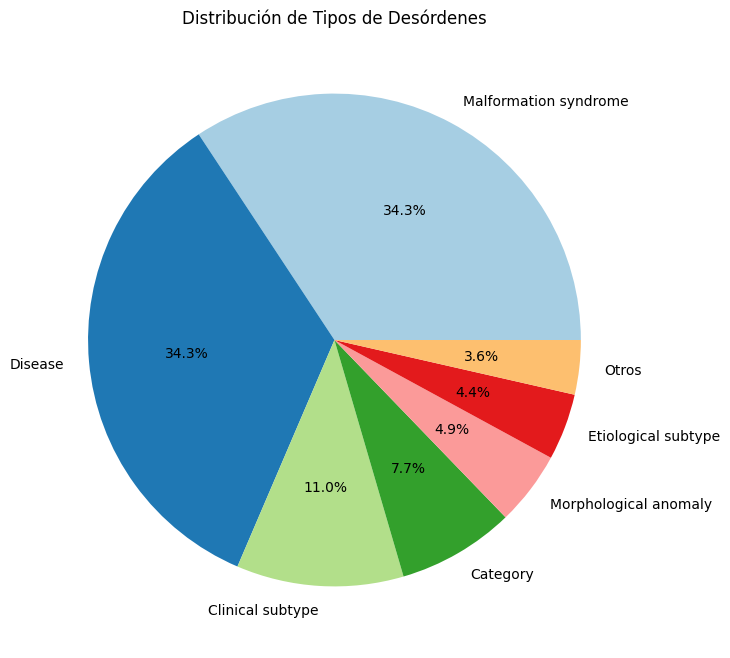

In [66]:
df_temp = df.copy()
conteo_tipo = df_temp['Disorder Type'].value_counts()
# Agrupamos los desórdenes con menos de 1000 ocurrencias bajo 'Otros'
otros = conteo_tipo[conteo_tipo < 1000].sum()  # Suma de todos los desórdenes pequeños
conteo_agrupado = conteo_tipo[conteo_tipo >= 1000]  # Mantener los que tienen >=1200
conteo_agrupado['Otros'] = otros  # Agregar la categoría 'Otros'

fig, ax= plt.subplots(figsize=(8,8))
ax.pie(conteo_agrupado, labels=conteo_agrupado.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title('Distribución de Tipos de Desórdenes')
plt.ylabel('')
plt.show()

In [144]:
# Filtrar desórdenes
df_disorders_type = df[['Disorder Type','Has Parent','Has GrandParent','Has 3rd Gen','Has 4th Gen','Has 5th Gen','Disorder Name']].copy()
max_disorders = df_disorders_type.shape[0]
conteo_generaciones = 0
df_disorders_type['Has Generations'] = False

# Contar cuántos tienen relaciones genealógicas conocidas (parent o grandparent)
for index, row in df_disorders_type.iterrows():
  if row['Has Parent'] == True or row['Has GrandParent']== True or row['Has 3rd Gen']== True or row['Has 4th Gen']== True or row['Has 5th Gen']== True:
    conteo_generaciones += 1
    df_disorders_type.at[index,'Has Generations'] = True
  else:
    conteo_generaciones = conteo_generaciones
    df_disorders_type.at[index,'Has Generations'] = False

# Calcular el porcentaje
percentage_with_relations = (conteo_generaciones * 100)/max_disorders

print(f"El {percentage_with_relations:.2f}% de los desórdenes genéticos raros tienen relaciones genealógicas conocidas.")

El 98.32% de los desórdenes genéticos raros tienen relaciones genealógicas conocidas.


In [149]:
max_disorders

26778

**¿Existen patrones en la herencia según el tipo de trastorno?:**

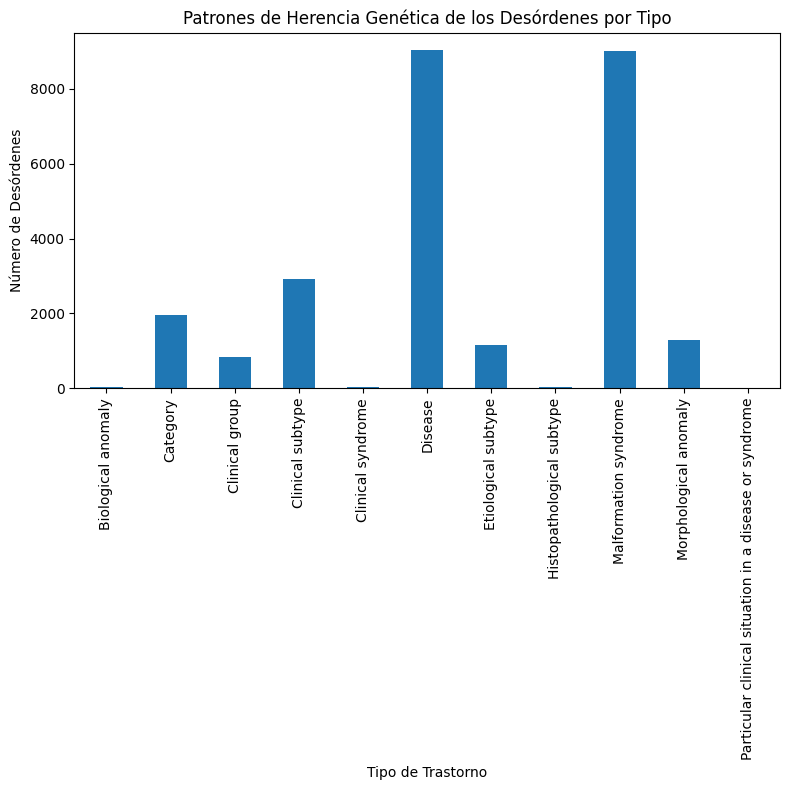

In [145]:
df_disorders_type = df_disorders_type[df_disorders_type['Has Generations']==True]

patrones_herencia = df_disorders_type.groupby('Disorder Type').size()

# Graficar
fig, ax= plt.subplots(figsize=(8,8))
patrones_herencia.plot(kind='bar', stacked=True, ax=ax)
plt.title('Patrones de Herencia Genética de los Desórdenes por Tipo')
plt.xlabel('Tipo de Trastorno')
plt.ylabel('Número de Desórdenes')
plt.tight_layout()  # Ajusta el diseño para evitar recortes
plt.show()

In [146]:
df_disorders_type['Has Generations'].value_counts()

,count
Has Generations,
True,26328


In [147]:
patrones_herencia

,0
Disorder Type,
Biological anomaly,21
Category,1962
Clinical group,840
Clinical subtype,2928
Clinical syndrome,41
Disease,9043
Etiological subtype,1168
Histopathological subtype,30
Malformation syndrome,9010


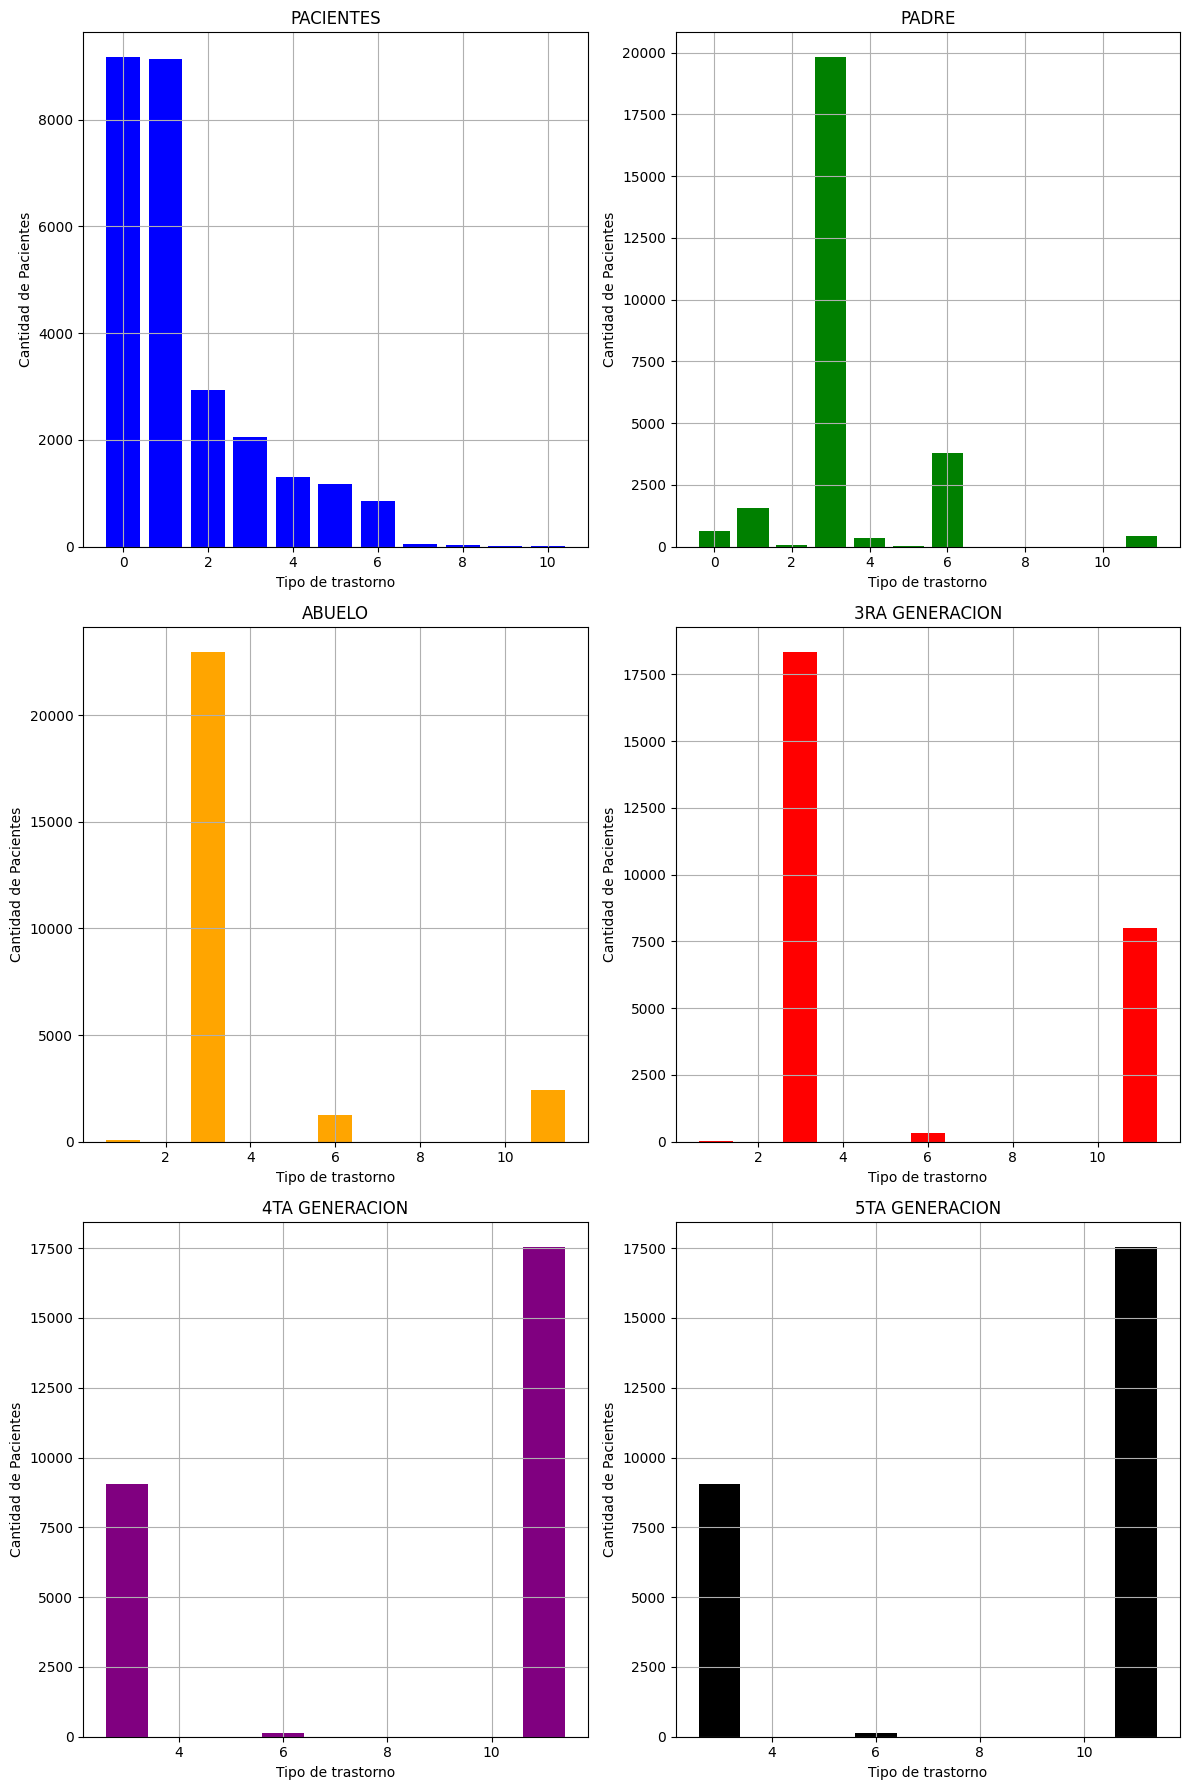

In [ ]:
fig, axs= plt.subplots( 3, 2, figsize=(12,18))

#Gráfico 1 Paciente
df_dt = df['Disorder Type'].value_counts()
dict = {item: index for index, item in enumerate(df_dt.index)}
axs[0, 0].bar(dict.values(), df_dt.values, color='blue')
axs[0, 0].set_title('PACIENTES')
axs[0, 0].set_xlabel('Tipo de trastorno')
axs[0, 0].set_ylabel('Cantidad de Pacientes')
axs[0, 0].grid(True)

#Gráfico 2 Padre
df_dtP = df['Parent Disorder Type'].value_counts()
dict['N/A'] = 11
valoresP = [dict[key] for key in df_dtP.index if key in dict]
axs[0, 1].bar(valoresP, df_dtP.values, color='green')
axs[0, 1].set_title('PADRE')
axs[0, 1].set_xlabel('Tipo de trastorno')
axs[0, 1].set_ylabel('Cantidad de Pacientes')
axs[0, 1].grid(True)

#Gráfico 3 Abuelo
df_dtGP = df['GrandParent Disorder Type'].value_counts()
valoresGP = [dict[key] for key in df_dtGP.index if key in dict]
axs[1, 0].bar(valoresGP, df_dtGP.values, color='orange')
axs[1, 0].set_title('ABUELO')
axs[1, 0].set_xlabel('Tipo de trastorno')
axs[1, 0].set_ylabel('Cantidad de Pacientes')
axs[1, 0].grid(True)

#Gráfico 4 3ra Gen
df_dt3rd = df['3rd Gen Disorder Type'].value_counts()
valores3rd = [dict[key] for key in df_dt3rd.index if key in dict]
axs[1, 1].bar(valores3rd, df_dt3rd.values, color='red')
axs[1, 1].set_title('3RA GENERACION')
axs[1, 1].set_xlabel('Tipo de trastorno')
axs[1, 1].set_ylabel('Cantidad de Pacientes')
axs[1, 1].grid(True)

#Gráfico 5 4ta Gen
df_dt4ta = df['4th Gen Disorder Type'].value_counts()
valores4ta = [dict[key] for key in df_dt4ta.index if key in dict]
axs[2, 0].bar(valores4ta, df_dt4ta.values, color='purple')
axs[2, 0].set_title('4TA GENERACION')
axs[2, 0].set_xlabel('Tipo de trastorno')
axs[2, 0].set_ylabel('Cantidad de Pacientes')
axs[2, 0].grid(True)

#Gráfico 6 5ta Gen
df_dt5ta = df['5th Gen Disorder Type'].value_counts()
valores5ta = [dict[key] for key in df_dt5ta.index if key in dict]
axs[2, 1].bar(valores5ta, df_dt5ta.values, color='black')
axs[2, 1].set_title('5TA GENERACION')
axs[2, 1].set_xlabel('Tipo de trastorno')
axs[2, 1].set_ylabel('Cantidad de Pacientes')
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()

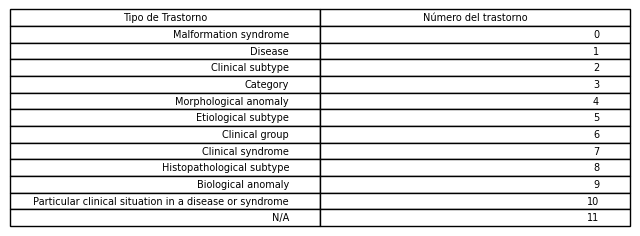

In [ ]:
#Clasificación para el gráfico
fig, ax= plt.subplots(figsize=(8,2))
kg=pd.DataFrame(dict.keys(), columns=['Tipo de Trastorno'])
kg['Número del trastorno'] = dict.values()
ax.table(cellText=kg.values, colLabels=kg.columns, loc='center')
ax.axis('off')
plt.show()

**Cantidad de pacientes con descendencia:**

In [ ]:
df.to_csv('df.csv', index=False)

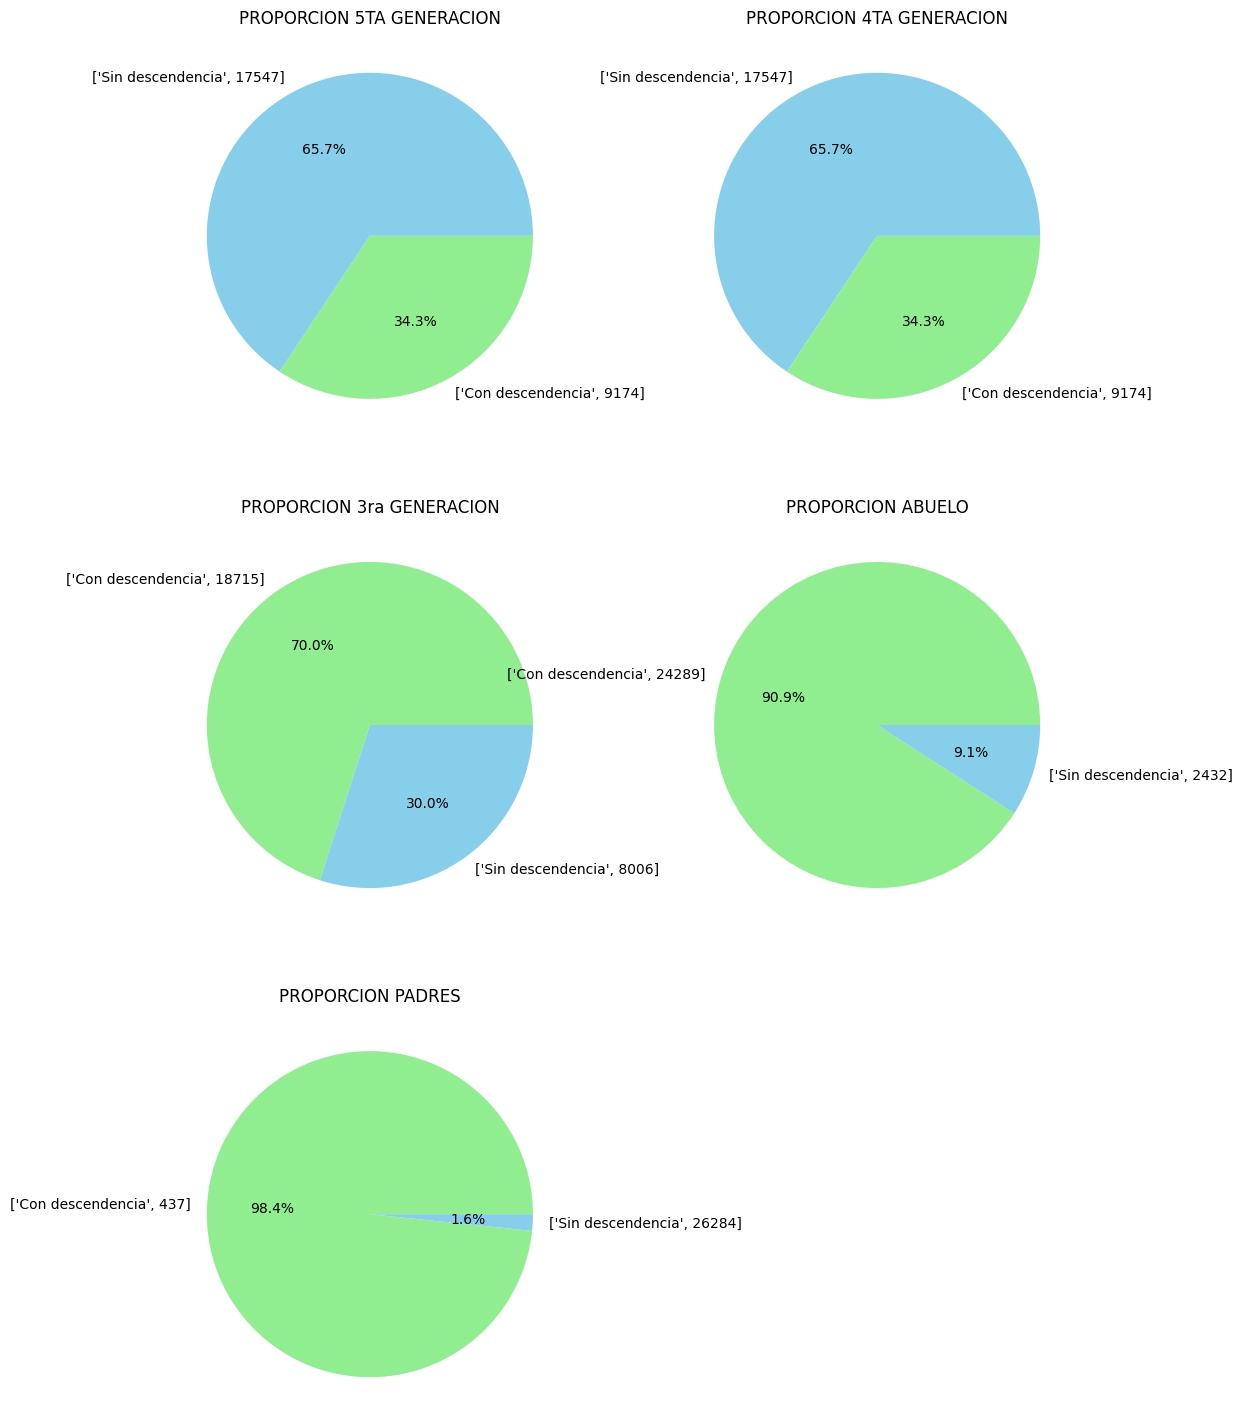

In [ ]:
fig, axs= plt.subplots( 3, 2, figsize=(12,18))

# Gráfico 1 5ta gen
count5th=df['Has 5th Gen'].value_counts()
axs[0,0].pie(count5th, labels=[['Sin descendencia',count5th.get(0,0)],['Con descendencia',count5th.get(1,0)]],
                                      colors=['skyblue', 'lightgreen'], autopct='%1.1f%%')
axs[0,0].set_title('PROPORCION 5TA GENERACION')

# Gráfico 2 4ta gen
count4th=df['Has 4th Gen'].value_counts()
axs[0,1].pie(count4th, labels=[['Sin descendencia',count4th.get(0,0)],['Con descendencia',count4th.get(1,0)]],
                                      colors=['skyblue', 'lightgreen'], autopct='%1.1f%%')
axs[0,1].set_title('PROPORCION 4TA GENERACION')

# Gráfico 3 3ra gen
count3ra=df['Has 3rd Gen'].value_counts()
axs[1,0].pie(count3ra, labels=[['Con descendencia',count3ra.get(1,0)],['Sin descendencia',count3ra.get(0,0)]],
                                      colors=['lightgreen','skyblue'], autopct='%1.1f%%')
axs[1,0].set_title('PROPORCION 3ra GENERACION')

# Gráfico 4 Abuelos
countGP=df['Has GrandParent'].value_counts()
axs[1,1].pie(countGP, labels=[['Con descendencia',countGP.get(1,0)],['Sin descendencia',countGP.get(0,0)]],
                                      colors=['lightgreen','skyblue'], autopct='%1.1f%%')
axs[1,1].set_title('PROPORCION ABUELO')

# Gráfico 5 Padres
countP=df['Has Parent'].value_counts()
axs[2,0].pie(countP, labels=[['Con descendencia',countP.get(0,0)],['Sin descendencia',countP.get(1,0)]],
                                      colors=['lightgreen','skyblue'], autopct='%1.1f%%')
axs[2,0].set_title('PROPORCION PADRES')

# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.ylabel('')
plt.show()
